Install .tar archive here:

http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

move archive file in /data folder
unzip with this command: tar -xf .\VOCtrainval_11-May-2012.tar

In [1]:
import os
from os import listdir
from os.path import isfile, join
import xml.etree.ElementTree as ET
from collections import OrderedDict
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
imageClass_dir = f"{os.getcwd()}\data\VOCdevkit\VOC2012\SegmentationClass"
imageJPG_dir = f"{os.getcwd()}\data\VOCdevkit\VOC2012\JPEGImages"
imageAnno_dir = f"{os.getcwd()}\data\VOCdevkit\VOC2012\Annotations"

# Visualize data

## 1 - Annotation

In [3]:
def extract_single_xml_file(tree):
    Nobj = 0
    row  = OrderedDict()
    for elems in tree.iter():

        if elems.tag == "size":
            for elem in elems:
                row[elem.tag] = int(elem.text)
        if elems.tag == "object":
            for elem in elems:
                if elem.tag == "name":
                    row["bbx_{}_{}".format(Nobj,elem.tag)] = str(elem.text)              
                if elem.tag == "bndbox":
                    for k in elem:
                        row["bbx_{}_{}".format(Nobj,k.tag)] = float(k.text)
                    Nobj += 1
    row["Nobj"] = Nobj
    return(row)

df_anno = []
for fnm in os.listdir(imageAnno_dir):  
    if not fnm.startswith('.'): ## do not include hidden folders/files
        tree = ET.parse(os.path.join(imageAnno_dir,fnm))
        row = extract_single_xml_file(tree)
        row["fileID"] = fnm.split(".")[0]
        df_anno.append(row)
df_anno = pd.DataFrame(df_anno)

maxNobj = np.max(df_anno["Nobj"])

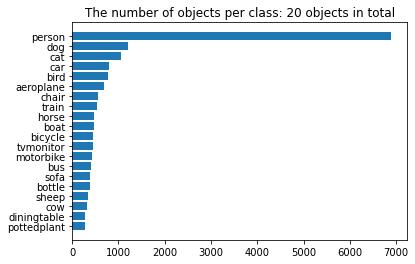

,width,height,depth,bbx_0_name,bbx_0_xmin,bbx_0_ymin,bbx_0_xmax,bbx_0_ymax,Nobj,fileID,...,bbx_54_name,bbx_54_xmin,bbx_54_ymin,bbx_54_xmax,bbx_54_ymax,bbx_55_name,bbx_55_xmin,bbx_55_ymin,bbx_55_xmax,bbx_55_ymax
0,486,500,3,person,174.0,101.0,349.0,351.0,1,2007_000027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500,281,3,aeroplane,104.0,78.0,375.0,183.0,4,2007_000032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500,366,3,aeroplane,9.0,107.0,499.0,263.0,3,2007_000033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500,375,3,tvmonitor,156.0,89.0,344.0,279.0,1,2007_000039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500,335,3,train,263.0,32.0,500.0,295.0,2,2007_000042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
count_detection = df_anno['bbx_0_name'].value_counts(ascending=True)

xs = range(len(count_detection))
labels = count_detection.keys()

plt.barh(xs,count_detection)
plt.yticks(xs,labels)
plt.title(f"The number of objects per class: {len(count_detection)} objects in total")
plt.show()

df_anno.head()

## 2 - Class and mask

In [5]:
onlyfiles = [f for f in listdir(imageClass_dir) if isfile(join(imageClass_dir, f))]

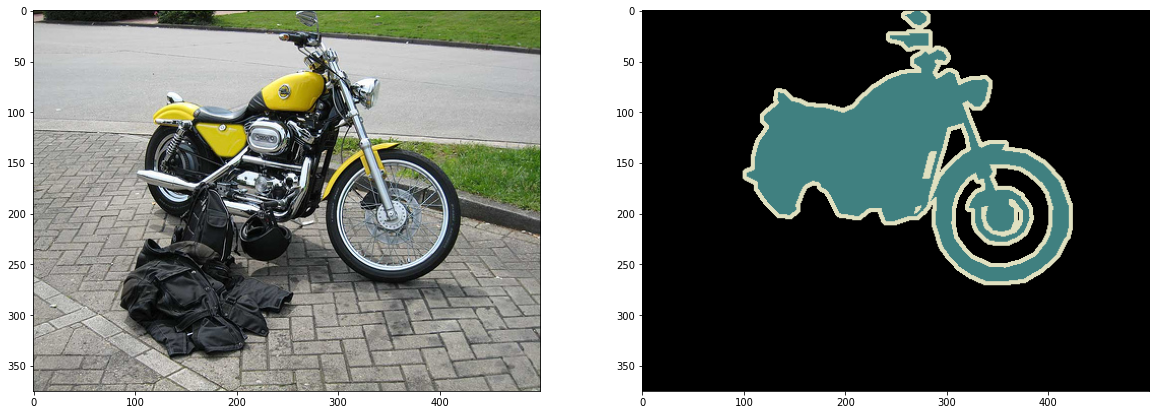

In [6]:
imgClassPath = rd.choices(onlyfiles)
imgClassPath = imgClassPath[0]

imgPath = imgClassPath.replace('.png','.jpg')

img = plt.imread(f"{imageJPG_dir}\{imgPath}")
imgClass = plt.imread(f"{imageClass_dir}\{imgClassPath}")

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(imgClass)